## Import packages

In [24]:
import os
import json
import matplotlib.pyplot as plt

## Load embeddings

In [25]:
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [26]:
# dir_name = 'emb-3-base-vgg16-207'
# dir_name = 'emb-4-base-vgg19_pretrained'
dir_name = 'emb-5-base-vgg19_pretrained-10.0'

In [27]:
dir_path = f'../../data/embedding/emb2d/data/{dir_name}'
filenames = os.listdir(dir_path)

In [28]:
model_names = [filename.split('-')[1] for filename in filenames if ('emb2d' in filename)]
model_types = {}
for model_name in model_names:
    model_type = '_'.join(model_name.split('_')[:-1])
    if model_type not in model_types:
        model_types[model_type] = []
    model_types[model_type].append(model_name)    

models = []
for model_type in model_types:
    model_names = model_types[model_type]
    if len(model_names) > 1:
        sorted_model_names = sorted(model_names, key=lambda x: int(x.split('_')[-1]))
        models += sorted_model_names
    else:
        models += model_names
print(models)

file_names = [
    f'emb2d-{model}-dim=30-model_for_emb_space=base.json'
    for model in models
]

data = [load_json(os.path.join(dir_path, file_name)) for file_name in file_names]

['vgg16_no_dropout_256_0.01_0.9_0', 'vgg16_no_dropout_256_0.01_0.9_1', 'vgg16_no_dropout_256_0.01_0.9_2', 'vgg16_no_dropout_256_0.01_0.9_3', 'vgg16_no_dropout_256_0.01_0.9_30', 'inception_v3_512_1.5_0.9_4', 'inception_v3_512_1.5_0.9_69', 'inception_v3_512_1.5_0.9_70', 'inception_v3_512_1.5_0.9_71', 'inception_v3_512_1.5_0.9_100', 'inception_v3_512_1.5_0.9_298', 'vgg16_512_0.01_0.9_5', 'vgg16_512_0.01_0.9_7', 'vgg16_512_0.01_0.9_21', 'vgg16_512_0.01_0.9_207', 'vgg16_pretrained', 'inception_v3_512_0.5_0.9_3', 'inception_v3_512_0.5_0.9_11', 'inception_v3_512_0.5_0.9_121', 'vgg16_512_0.05_0.9_3', 'vgg16_512_0.05_0.9_11', 'vgg16_512_0.05_0.9_12', 'vgg16_512_0.05_0.9_13', 'vgg16_512_0.05_0.9_14', 'vgg16_512_0.05_0.9_54', 'vgg19_pretrained', 'inception_v3_pretrained']


In [29]:
print(len(models))
print(len(data))
models

27
27


['vgg16_no_dropout_256_0.01_0.9_0',
 'vgg16_no_dropout_256_0.01_0.9_1',
 'vgg16_no_dropout_256_0.01_0.9_2',
 'vgg16_no_dropout_256_0.01_0.9_3',
 'vgg16_no_dropout_256_0.01_0.9_30',
 'inception_v3_512_1.5_0.9_4',
 'inception_v3_512_1.5_0.9_69',
 'inception_v3_512_1.5_0.9_70',
 'inception_v3_512_1.5_0.9_71',
 'inception_v3_512_1.5_0.9_100',
 'inception_v3_512_1.5_0.9_298',
 'vgg16_512_0.01_0.9_5',
 'vgg16_512_0.01_0.9_7',
 'vgg16_512_0.01_0.9_21',
 'vgg16_512_0.01_0.9_207',
 'vgg16_pretrained',
 'inception_v3_512_0.5_0.9_3',
 'inception_v3_512_0.5_0.9_11',
 'inception_v3_512_0.5_0.9_121',
 'vgg16_512_0.05_0.9_3',
 'vgg16_512_0.05_0.9_11',
 'vgg16_512_0.05_0.9_12',
 'vgg16_512_0.05_0.9_13',
 'vgg16_512_0.05_0.9_14',
 'vgg16_512_0.05_0.9_54',
 'vgg19_pretrained',
 'inception_v3_pretrained']

In [30]:
X_range, Y_range = [1000, -1000], [1000, -1000]
for json_data in data:
    for neuron in json_data:
        x, y = json_data[neuron]
        X_range[0] = min(X_range[0], x)
        X_range[1] = max(X_range[1], x)
        Y_range[0] = min(Y_range[0], y)
        Y_range[1] = max(Y_range[1], y)
        
X_range[0] -= 0.1
X_range[1] += 0.1
Y_range[0] -= 0.1
Y_range[1] += 0.1
X_range, Y_range

([0.709887170791626, 12.829246139526367],
 [3.4274863243103026, 11.816477394104004])

In [31]:
def model_to_model_name(model):
    if ('vgg16' in model) and ('no_dropout' in model):
        return 'Vgg16-no_dropout'
    elif 'vgg16' in model:
        return 'Vgg16'
    elif 'inception_v3' in model:
        return 'InceptionV3'
    elif 'vgg19' in model:
        return 'Vgg19'

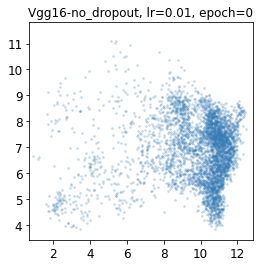

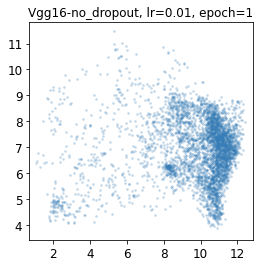

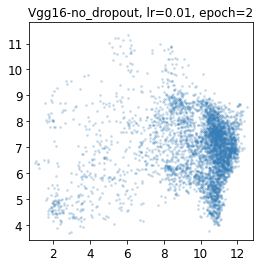

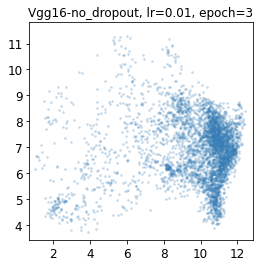

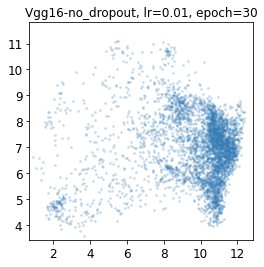

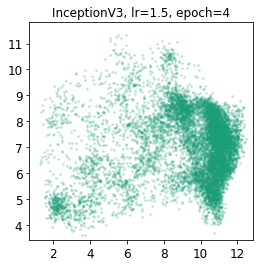

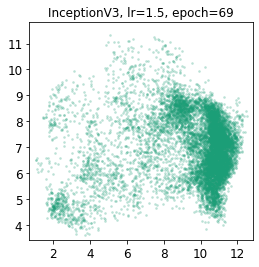

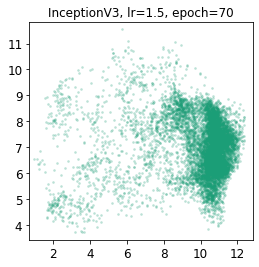

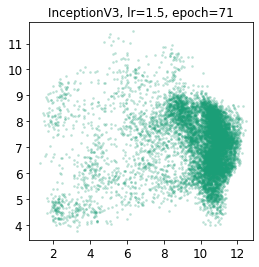

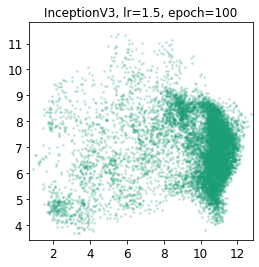

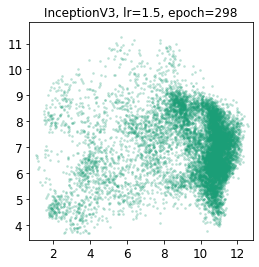

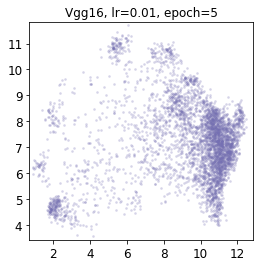

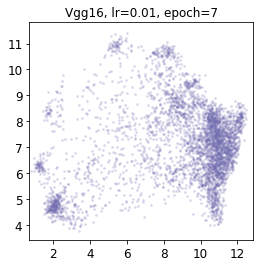

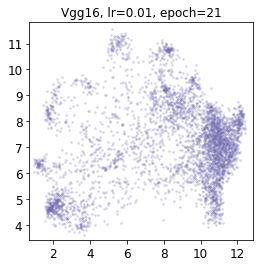

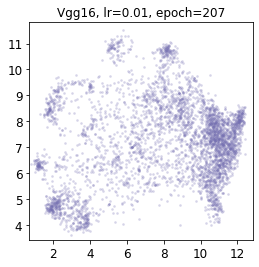

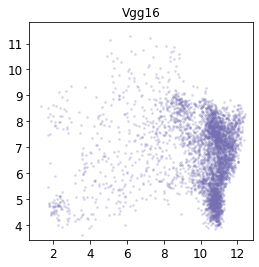

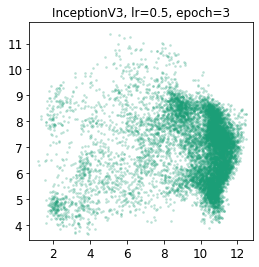

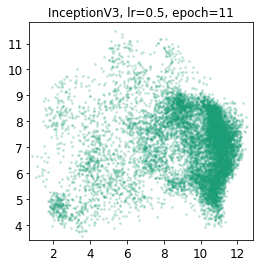

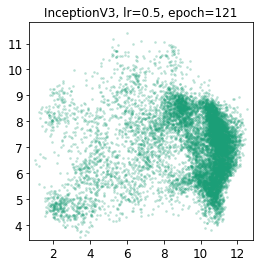

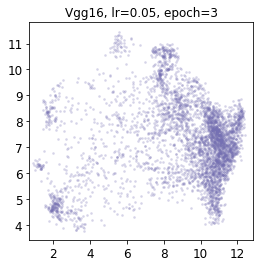

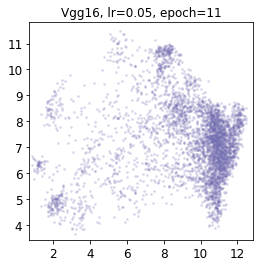

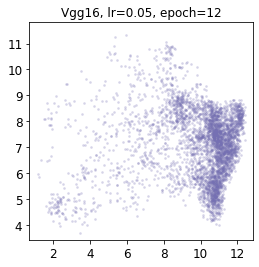

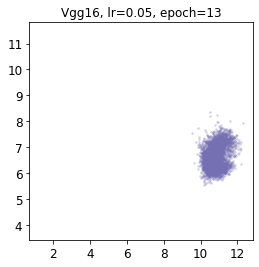

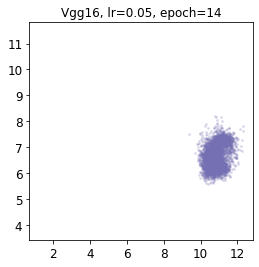

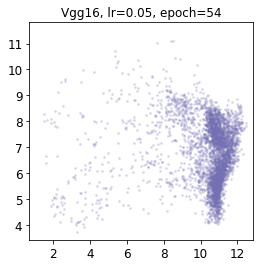

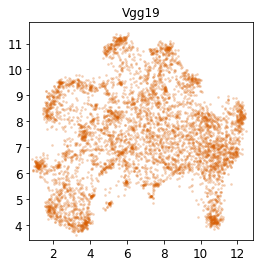

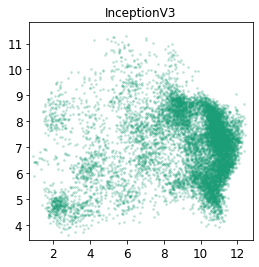

In [32]:
fig_dir = f'../../data/fig/{dir_name}'
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

colors = ['#7570b3', '#377eb8', '#1b9e77', '#d95f02', '#984ea3', '#e41a1c', '#4daf4a']
color_map = {
    'Vgg16': colors[0],
    'Vgg16-no_dropout': colors[1],
    'InceptionV3': colors[2],
    'Vgg19': colors[3]
}

for model, json_data in zip(models, data):
    Xs = [json_data[neuron][0] for neuron in json_data]
    Ys = [json_data[neuron][1] for neuron in json_data]
    
    model_name = model_to_model_name(model)
    if 'pretrained' in model:
        title = model_name
    else:
        epoch = model.split('_')[-1]
        learning_rate = model.split('_')[-3]
        title = f'{model_name}, lr={learning_rate}, epoch={epoch}'
        
    file_name = title.replace(' ', '_').replace(',', '_')
    color = color_map[model_name]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(Xs, Ys, s=3, alpha=0.2, c=color)
    plt.xlim(X_range)
    plt.ylim(Y_range)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title)
    plt.savefig(f'{fig_dir}/{file_name}.svg')
    plt.show()